In [1]:
import numpy as np
import xarray as xr
import matplotlib.pyplot as plt
plt.rc('font',**{'size':20})

from scipy import stats
import yaml

In [2]:
with open('data/plus2K_TC_DGPI_SPI_SW.yaml', 'r') as f:
    raw = yaml.safe_load(f)

In [3]:
models = ['HiRAM', 'AM2.5C180', 'AM2.5C360']

modellabels = {'HiRAM': 'HiRAM-50km', 'AM2.5C180': 'AM2.5-50km', 'AM2.5C360': 'AM2.5-25km'}

basin = 'NH Tropics'

data = raw[basin]

dtc = np.array([data[m]['tc_percent'] for m in models])
ddgpi = np.array([data[m]['dgpi_percent'] for m in models])
dspi = np.array([data[m]['spi_percent'] for m in models])
sw = np.array([data[m]['lambda_c_sw'] for m in models])

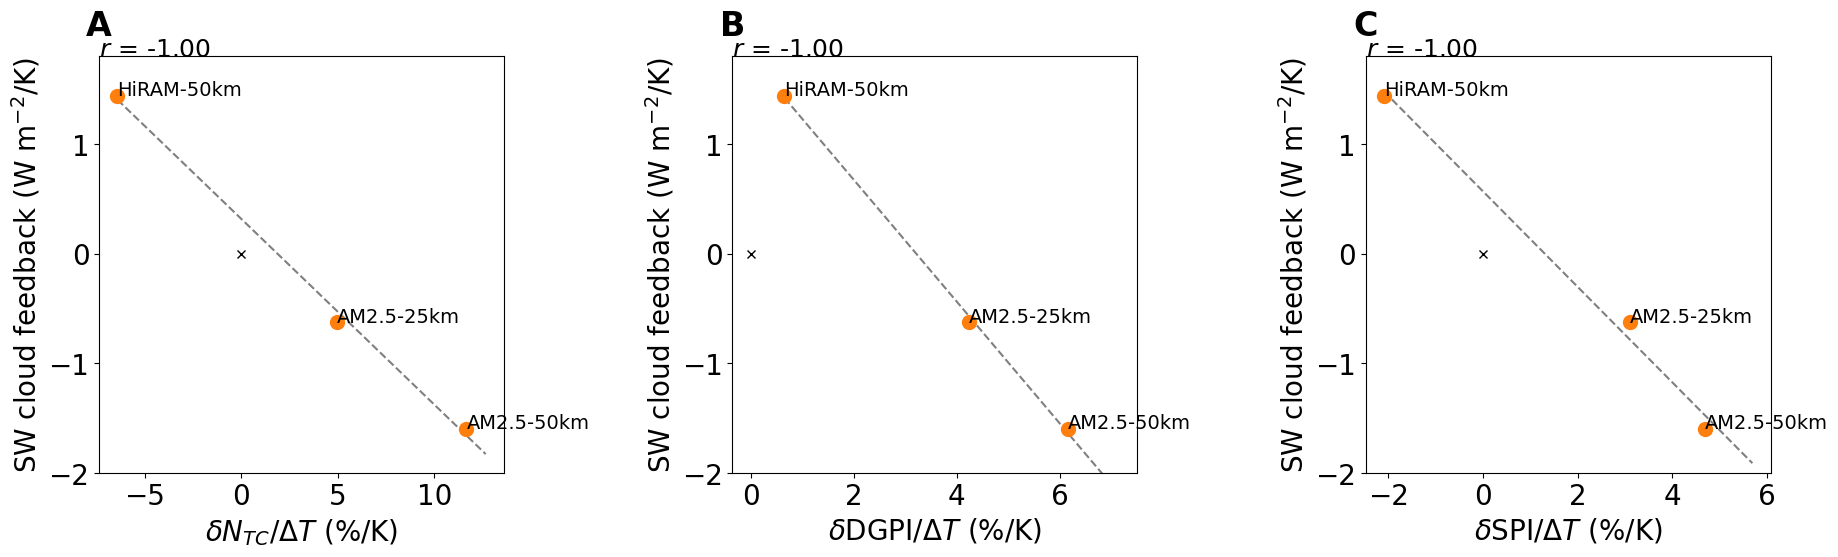

In [4]:
fig, axes = plt.subplots(1, 3, figsize=(19, 6), facecolor='w')

for ax, xx, yy, xlabel, ylabel in \
    zip(axes, 
        [dtc, ddgpi, dspi], 
        [sw, sw, sw], 
        ['$\delta N_{TC}$/$\Delta T$ (%/K)', '$\delta$DGPI/$\Delta T$ (%/K)', '$\delta$SPI/$\Delta T$ (%/K)'], 
        ['SW cloud feedback (W m$^{-2}$/K)', 'SW cloud feedback (W m$^{-2}$/K)', 'SW cloud feedback (W m$^{-2}$/K)']):
    plt.sca(ax)
    
    slope, intercept, r_value, p_value, std_err = stats.linregress(xx, yy)
    xx_tmp = np.linspace(np.nanmin(xx), np.nanmax(xx)+1)
    plt.plot(xx_tmp, intercept + slope*xx_tmp, 'gray', ls='--')
    plt.text(0, 1.0, '$r$ = %.2f'%(r_value), transform=ax.transAxes, fontsize=18)

    plt.plot(xx, yy, 'o', c='tab:orange', markersize=10)
    plt.plot([0], [0], 'kx')

    plt.ylim(-2, 1.8)

    for i in range(len(models)):
        plt.gca().annotate(modellabels[models[i]], (xx[i], yy[i]), fontsize=14)

    plt.xlabel(xlabel)
    plt.ylabel(ylabel)

axes[0].set_xticks(range(-5, 10+1, 5))
axes[2].set_xticks(range(-2, 6+1, 2))

for i in range(len(axes)):
    plt.sca(axes[i])
    plt.text(0, 1.05, f'{chr(ord("A")+i)}', transform=plt.gca().transAxes, weight='bold', fontsize=24, horizontalalignment='center')

plt.tight_layout()

# plt.savefig('Fig2.pdf', bbox_inches='tight')